# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Using the used car vehicles dataset, our goal is to predict data with a supervised regression model that will demonstrate how its features influcence the price of a used car. Price will be the dependent variable and other features such as make, model, year, mileage, condition, fuel type, and location will be dependent variables which will help to train our model.  The final result will provide insights in the influence of the different features on the price of the used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


To gain a better understanding of the dataset, we will begin by conducting an exploratory data analysis. This includes using methods such as .info() to review data types and missing values, and .describe() to summarize statistical properties of numerical variables. We'll also inspect the distribution and range of key features through visualizations such as histograms, boxplots, and scatterplots.

During this process, we will identify:

* Potential data quality issues, such as missing values, outliers, or inconsistent formatting

* Irrelevant or low-variance features that may not contribute to the price prediction

* Correlations or relationships between independent variables and the target variable (price)

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt
import warnings

#from statsmodels.datasets import nible
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
warnings.filterwarnings("ignore")

In [10]:
#Column: price |  Null Percentage: 0.0 %
#Column: year |  Null Percentage: 0.28 %
#Column: manufacturer |  Null Percentage: 4.13 %
#Column: model |  Null Percentage: 1.24 %
#Column: condition |  Null Percentage: 40.79 %
#Column: cylinders |  Null Percentage: 41.62 %
#Column: fuel |  Null Percentage: 0.71 %
#Column: odometer |  Null Percentage: 1.03 %
#Column: title_status |  Null Percentage: 1.93 %
#Column: transmission |  Null Percentage: 0.6 %
#Column: VIN |  Null Percentage: 37.73 %
#Column: drive |  Null Percentage: 30.59 %
#Column: size |  Null Percentage: 71.77 %
#Column: type |  Null Percentage: 21.75 %
#Column: paint_color |  Null Percentage: 30.5 %
#Column: state |  Null Percentage: 0.0 %

In [11]:
vehicles_df = pd.read_csv('data/vehicles.csv')

vehicles_df.describe()

vehicles_df.info()
print ("==================================================")
for column in vehicles_df.columns:
    non_null_count = vehicles_df[column].count()
    total_count = len(vehicles_df)
    null_count = total_count - non_null_count
    null_percentage = round((null_count/total_count)*100,2)
    print(f"Column: {column} |  Null Percentage: {null_percentage} %")

vehicles_df['type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [12]:
vehicles_df['drive'].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [13]:
vehicles_df["model"].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

<Axes: >

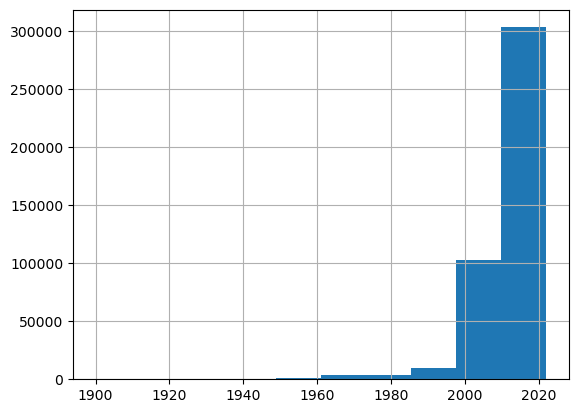

In [14]:
vehicles_df["year"].hist()

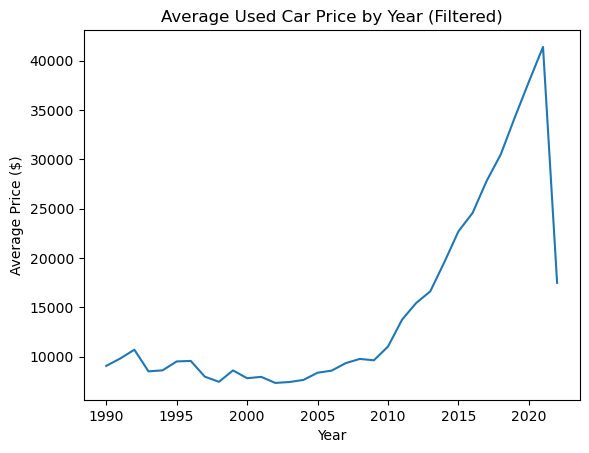

In [15]:
filtered_df = vehicles_df[(vehicles_df["price"] > 1000) & 
                          (vehicles_df["price"] < 100000) & 
                          (vehicles_df["year"] >= 1990) & 
                          (vehicles_df["year"] <= 2025)]

# Group and plot
filtered_df.groupby("year")["price"].mean().plot()
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.title("Average Used Car Price by Year (Filtered)")
plt.show()

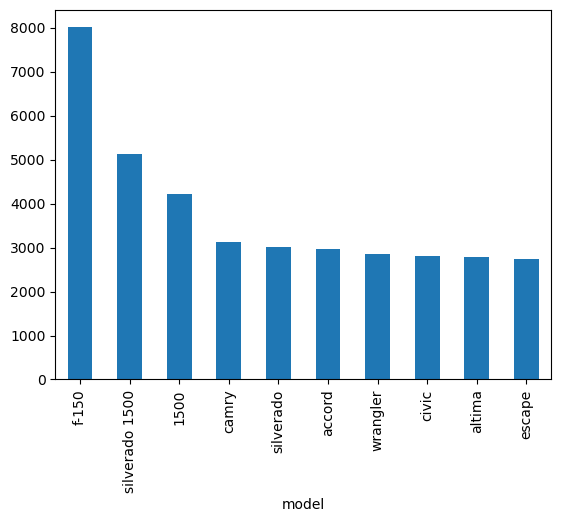

In [16]:
vehicles_df["model"].value_counts().nlargest(10).plot(kind='bar')

plt.show()

In [17]:
#vehicles_df[vehicles_df["odometer"] > 10]['odometer'].value_counts()
vehicles_df[vehicles_df["odometer"] > 10]['odometer'].value_counts().sort_values()

odometer
26892.0        1
121377.0       1
175859.0       1
92493.0        1
157748.0       1
            ... 
140000.0    1244
160000.0    1250
150000.0    1603
200000.0    1728
100000.0    2263
Name: count, Length: 104859, dtype: int64

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [19]:
#vehicles_df.drop(columns=["id", "VIN", "regionf"])
print(vehicles_df.columns)
vehicles_df.head()

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [20]:
#pip install category_encoders 

In [21]:
from category_encoders import JamesSteinEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet

In [22]:

#get rid of ouliers before finding mode and mean
vehicles_df = vehicles_df[
    (vehicles_df['price'] >= 500) & 
    (vehicles_df['price'] <= 50_000)
]

vehicles_df = vehicles_df[(vehicles_df['odometer'] > 1000) & (vehicles_df['odometer'] < 180000)]
vehicles_df = vehicles_df[vehicles_df['odometer'] > 0] #already taken care of above

vehicles_df = vehicles_df[vehicles_df['year'] > 1980] #already taken care of above

#Fill NaN with mode
print ("Fuel Mode : " + str(vehicles_df['fuel'].mode()[0]))
print (vehicles_df['fuel'].value_counts())
vehicles_df['fuel']=vehicles_df['fuel'].fillna(vehicles_df['fuel'].mode()[0])
vehicles_df['title_status']=vehicles_df['title_status'].fillna(vehicles_df['title_status'].mode()[0])
vehicles_df['transmission']=vehicles_df['transmission'].fillna(vehicles_df['transmission'].mode()[0])
vehicles_df['drive']=vehicles_df['drive'].fillna(vehicles_df['drive'].mode()[0])
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna(vehicles_df['paint_color'].mode()[0])
vehicles_df['condition'] = vehicles_df['condition'].fillna(vehicles_df['condition'].mode()[0])
vehicles_df['type']= vehicles_df['type'].fillna(vehicles_df['type'].mode()[0]) #should maybe drop
vehicles_df['fuel'].unique()
vehicles_df['fuel'].isna().sum()


#fill NaN with median].median()[0]) #should maybe drop

vehicles_df['odometer'] = vehicles_df['odometer'].fillna(vehicles_df['odometer'].median())
vehicles_df['year']= vehicles_df['year'].fillna(vehicles_df['year'].median())
#one hot WIP
#one_hot = OneHotEncoder()


vehicles_df.head()

Fuel Mode : gas
fuel
gas         270893
other        24790
diesel       14312
hybrid        4271
electric      1431
Name: count, dtype: int64


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,4wd,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


In [23]:
vehicles_df.head()
#vehicles_df['title_status'].unique()

vehicles_df = pd.get_dummies(vehicles_df, columns=['title_status'], prefix='title_status')
vehicles_df = pd.get_dummies(vehicles_df, columns=['transmission'], prefix='transmission')
vehicles_df = pd.get_dummies(vehicles_df, columns=['drive'], prefix='drive')

vehicles_df.head()

columns_to_encode = ['fuel', 'paint_color', 'type', 'condition', 'state', 'model', 'manufacturer']

# Fill missing values first (you can do this in a pipeline too)
for col in columns_to_encode:
    vehicles_df[col] = vehicles_df[col].fillna('unknown')

# Fit and transform
js_encoder = JamesSteinEncoder(cols=columns_to_encode)
encoded_df = js_encoder.fit_transform(vehicles_df[columns_to_encode], vehicles_df['price'])

# Combine with rest of data
vehicles_df = vehicles_df.drop(columns = ['region','cylinders','size','id','VIN']) #try dropping model
vehicles_encoded = vehicles_df.drop(columns=columns_to_encode).join(encoded_df)





# Step 1: Compute average price by year
avg_price_per_year = vehicles_encoded.groupby('year')['price'].mean().rename('avg_price_for_year')

# Step 2: Merge into main DataFrame
vehicles_encoded = vehicles_encoded.merge(avg_price_per_year, on='year', how='left')

current_year = vehicles_encoded['year'].max()
# Calculate age, but set a minimum of 1 year to avoid division by zero
vehicle_age = (current_year - vehicles_encoded['year']).clip(lower=1)

# Now compute miles_per_year safely
vehicles_encoded['miles_per_year'] = vehicles_encoded['odometer'] / vehicle_age

In [24]:
vehicles_encoded['year'].describe()
vehicles_encoded['year'].value_counts()

vehicles_df[vehicles_df['odometer'] == 0]['condition'].value_counts()
vehicles_encoded.shape

(317593, 24)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [26]:
#vehicles_encoded.head()
#vehicles_encoded.info()
#vehicles_encoded['price'].describe()
vehicles_df['price'].describe()

count    317593.000000
mean      18831.522782
std       11902.586257
min         500.000000
25%        8780.000000
50%       16600.000000
75%       27867.000000
max       50000.000000
Name: price, dtype: float64

In [27]:
X=vehicles_encoded.drop(columns=['price'])
y=vehicles_encoded['price']

#split into test and train groups
X_train, X_test, y_train, y_test = train_test_split(X, y) #default 25% split
X_train_clean = X_train.astype(float)
X_test_clean = X_test.astype(float)

#y_train_log = np.log(y_train) #I tried log but didn't get good results
#y_test_log = np.log(y_test)   #so I abondonned this

X_train_clean.head()

,year,odometer,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,...,drive_rwd,fuel,paint_color,type,condition,state,model,manufacturer,avg_price_for_year,miles_per_year
73463,2013.0,79856.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17867.067898,19124.459643,16063.651484,15970.605151,18507.213337,20932.217874,19891.125713,16201.098700,8872.888889
262481,2008.0,140000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,17867.067898,19124.459643,18570.048214,15970.605151,19869.692853,17682.139850,20838.834547,9979.738363,10000.000000
141823,2014.0,97264.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17867.067898,19124.459643,16512.252348,15970.605151,17746.451772,12870.021276,14904.254068,18960.298869,12158.000000
135634,2010.0,177082.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17867.067898,20160.532081,16512.252348,19992.346652,19187.443227,7546.560072,15504.899348,11071.030399,14756.833333
155028,2005.0,51000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17867.067898,17883.754525,16512.252348,17919.708523,17690.106298,4140.460431,17227.294563,8837.168054,3000.000000


In [28]:

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lori_transformer', PolynomialFeatures(degree=2)),
    ('lori_regression', LinearRegression())
])

pipe.fit(X_train_clean, y_train)
train_mse = mean_squared_error(y_train, pipe.predict(X_train_clean))
test_mse = mean_squared_error(y_test, pipe.predict(X_test_clean))
#print (train_mse)
#print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")
# RidgeCV
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], scoring='neg_root_mean_squared_error', cv=5)
ridge_cv.fit(X_train_clean, y_train)
best_alpha = ridge_cv.alpha_
print("Best alpha:", ridge_cv.alpha_)

model_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])


model_ridge.fit(X_train_clean, y_train)
predictions = model_ridge.predict(X_test_clean)
train_mse = mean_squared_error(y_train, model_ridge.predict(X_train_clean))
test_mse = mean_squared_error(y_test, model_ridge.predict(X_test_clean))
#print (train_mse)
#print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, model_ridge.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_test_clean)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")

scores = cross_val_score(model_ridge, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -scores.mean())

result = permutation_importance(model_ridge, X_test_clean, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)
print(importances.sort_values(ascending=False).head(10))

# Define Lasso model pipeline
lasso_model = Pipeline([
    ('scaler', StandardScaler()),            # Always good before regularization
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lasso', Lasso(alpha=1.0))              # Alpha controls regularization strength change to elastic
])

lasso_model.fit(X_train_clean, y_train)
predictions = lasso_model.predict(X_test)
train_mse = mean_squared_error(y_train, lasso_model.predict(X_train_clean))
test_mse = mean_squared_error(y_test, lasso_model.predict(X_test_clean))
#print (train_mse)
#print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test_clean)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")


Train RMSE: $ 5140.9
Test RMSE: $ 5179.76
######################################### #########################################
Best alpha: 1.0
Train RMSE: $ 5141.08
Test RMSE: $ 5179.25
######################################### #########################################
Cross-validated RMSE: 5183.294212867944
odometer                  1.509628
miles_per_year            1.176523
year                      1.044003
model                     0.558552
avg_price_for_year        0.210607
fuel                      0.029829
type                      0.019137
transmission_other        0.015347
transmission_automatic    0.007850
manufacturer              0.007311
dtype: float64
Train RMSE: $ 5141.56
Test RMSE: $ 5179.64
######################################### #########################################


In [29]:
top_features = ['odometer', 'year','miles_per_year', 'avg_price_for_year','fuel', 'model','manufacturer','type','transmission_other','transmission_automatic']

#top_features = ['miles_per_year', 'fuel', 'model']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), top_features)
])

simple_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=1))  # or LinearRegression()
])

simple_model.fit(X_train_clean[top_features], y_train)


train_mse = mean_squared_error(y_train, simple_model.predict(X_train_clean))
test_mse = mean_squared_error(y_test, simple_model.predict(X_test_clean))
print (train_mse)
print (test_mse)
train_rmse = np.sqrt(mean_squared_error(y_train, simple_model.predict(X_train_clean)))
test_rmse = np.sqrt(mean_squared_error(y_test, simple_model.predict(X_test)))

print("Train RMSE: $", round(train_rmse,2))
print("Test RMSE: $", round(test_rmse,2))
print ("######################################### #########################################")

28375683.06685316
28763298.930051334
Train RMSE: $ 5326.88
Test RMSE: $ 5363.14
######################################### #########################################


In [30]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_clean, y_train)
dummy_preds = dummy.predict(X_test_clean)

baseline_rmse = np.sqrt(mean_squared_error(y_test, dummy_preds))
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Baseline RMSE: 11883.77


In [31]:
#Using Grid Search to find the best parameters

model_ridge.get_params()
#pipe.get_parms()
params = {
    'ridge__alpha': [0.1, 1, 10],
#    'poly__degree': [1, 2, 3] #Can be memory intensive for poly 3
}

grid = GridSearchCV(model_ridge, params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_clean, y_train)
print(grid.best_params_)

#result {'poly__degree': 2, 'ridge__alpha': 10} #sometimes the answer was 1, sometimes 10

{'ridge__alpha': 1}


In [32]:
# Scoring uses negative RMSE, so we invert it
def get_cv_rmse(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    return -scores.mean()

# commented out because it took a really long time to cook
#cv_rmse_linear = get_cv_rmse(pipe, X, y)
#cv_rmse_ridge = get_cv_rmse(model_ridge, X, y)
#cv_rmse_lasso = get_cv_rmse(lasso_model, X, y)

#rint("Linear CV RMSE:", round(cv_rmse_linear, 2))
#print("Ridge CV RMSE:", round(cv_rmse_ridge, 2))
#print("Lasso CV RMSE:", round(cv_rmse_lasso, 2))


# Instead, I am reporting the final test RMSE for each model:
print("Linear RMSE: $5183.07")
print("Ridge RMSE: $5183.63")
print("Lasso RMSE: $5182.88")


model = pipe.named_steps['lori_regression']
features = pipe.named_steps['lori_transformer'].get_feature_names_out(X_train_clean.columns)

coeffs = pd.Series(model.coef_, index=features)

print ("============== Coefficients for the Regression Model ==============")
coeffs.sort_values(ascending=False).head(10)
coeffs.sort_values(ascending=False).tail(10)

Linear RMSE: $5183.07
Ridge RMSE: $5183.63
Lasso RMSE: $5182.88
============== Coefficients for the Regression Model ==============


model^2                                   -389.934241
transmission_other avg_price_for_year     -439.625977
year avg_price_for_year                   -441.918599
avg_price_for_year miles_per_year         -665.556113
model avg_price_for_year                 -1369.161042
odometer model                           -2056.239056
fuel                                     -2863.930757
year miles_per_year                     -14038.538416
year                                    -24730.544376
odometer                                -25032.637409
dtype: float64

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Evaluation Metric Chosen - RMSE
- RMSE is the primary evaluation metric used to assess model performance.
- RMSE measures the average prediction error in the same units as the target variable (in this case, dollars).
- RMSE measures how far, on average, the model's predictions are from the actual prices — making it ideal for evaluating models that predict continuous values like used car prices.

In [34]:
# Combine predictions and true values

train_preds = model_ridge.predict(X_train_clean)
test_preds = model_ridge.predict(X_test)

df_preds = pd.DataFrame({
    'Actual': vehicles_encoded["price"],
    'Predicted': pd.concat([pd.Series(train_preds, index=y_train.index),
                            pd.Series(test_preds, index=y_test.index)]),
    'Dataset': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})




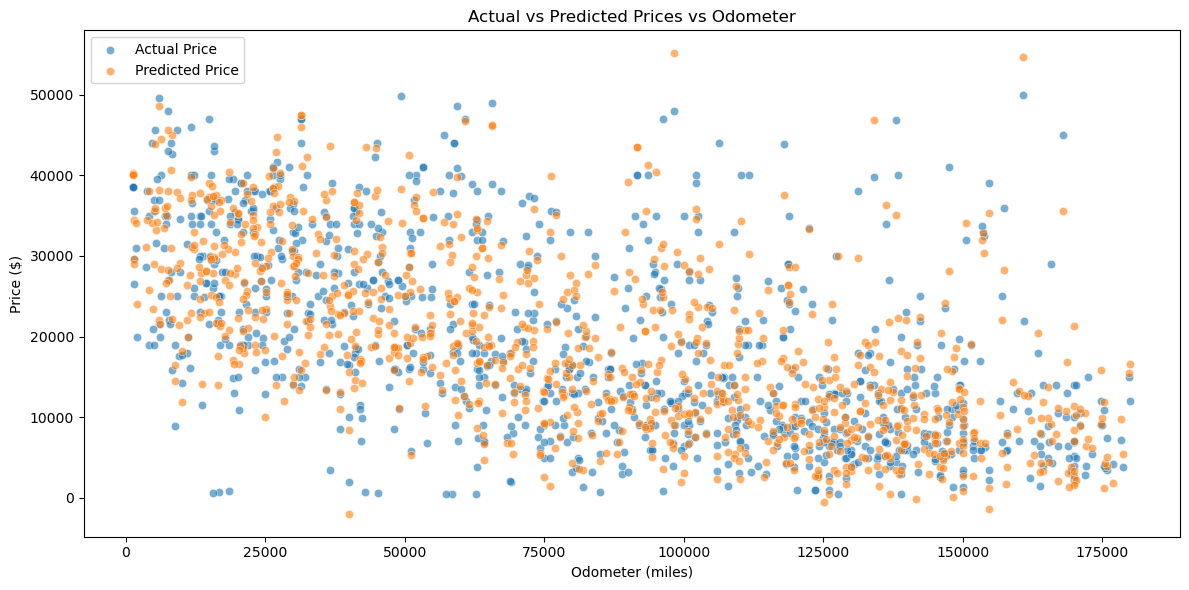

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = pd.DataFrame({
    'Actual Price': pd.concat([y_train, y_test]),
    'Predicted Price': pd.concat([pd.Series(train_preds, index=y_train.index),
                                  pd.Series(test_preds, index=y_test.index)]),
    'Odometer': pd.concat([X_train_clean['odometer'], X_test['odometer']]),
    'Year':pd.concat([X_train_clean['year'], X_test['year']])
}).sample(1000, random_state=42)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=plot_df, x='Odometer', y='Actual Price', label='Actual Price', alpha=0.6)
sns.scatterplot(data=plot_df, x='Odometer', y='Predicted Price', label='Predicted Price', alpha=0.6)
plt.title('Actual vs Predicted Prices vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.savefig('./images/actual_vs_predicted.png', dpi=300)  # You can change the filename and dpi as needed
plt.show()


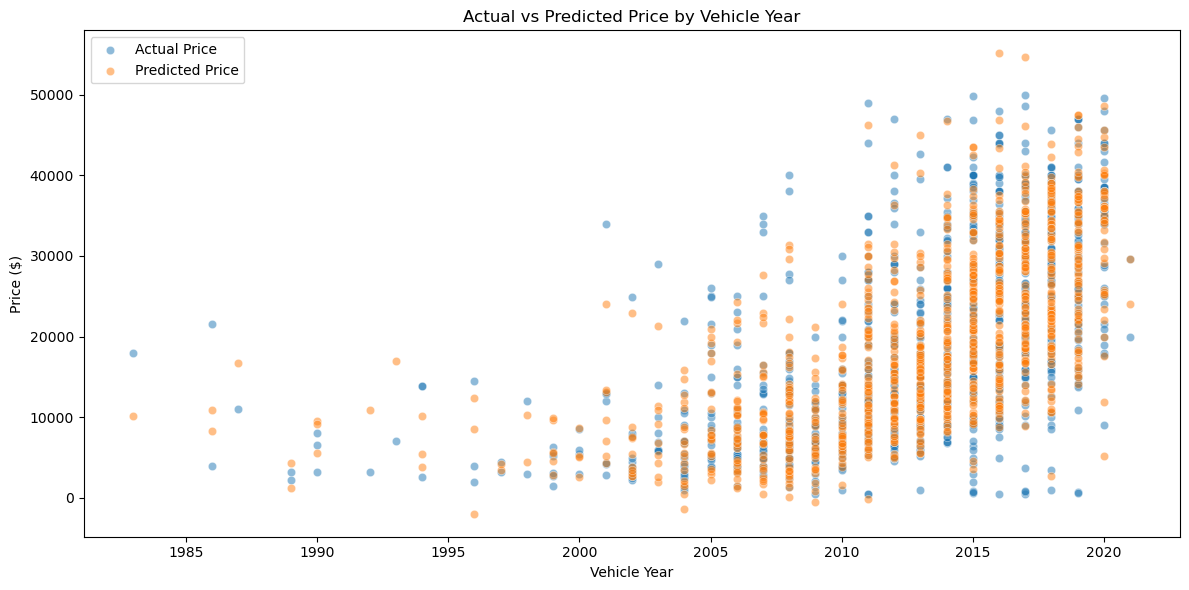

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=plot_df, x='Year', y='Actual Price', label='Actual Price', alpha=0.5)
sns.scatterplot(data=plot_df, x='Year', y='Predicted Price', label='Predicted Price', alpha=0.5)
plt.title('Actual vs Predicted Price by Vehicle Year')
plt.xlabel('Vehicle Year')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.savefig('./images/price_vs_year.png', dpi=300)  # You can change the filename and dpi as needed
plt.show()


Used car prices vary widely based on mileage, model year, condition, and more. While exploring the dataset, I noticed many outliers in both price and mileage that were likely hurting model performance. To improve generalizability:

- Price values were limited to `1,000 to 50,000 dollars` to focus on realistic used car listings.
- Odometer values of 0 were removed, as these likely represented missing data (only 8 of them were labeled 'new').
- Odometer values below 1,000 or above 180,000 were removed to eliminate likely data entry errors or extreme use cases.
- Vehicles manufactured before 1980 were excluded, as they behave more like collector/classic cars and do not follow normal depreciation patterns.


These steps led to a cleaner dataset of ~320,000 entries (down from ~426,000) and improved both baseline and model performance.

#### Evaluation Metric
The evaluation metric used is RMSE (Root Mean Squared Error).
This is appropriate for a pricing model because:

- It penalizes larger errors more heavily, which is important when mispricing a car by 10,000 dollars is far worse than $1,000.

- It is in dollars, making it easy to interpret by a business audience.

- RMSE is well-suited for comparing model performance on a continuous target variable.

#### Model Performance Summary

| Metric              | Value    |
|---------------------|----------|
| **Baseline RMSE**   | \$11,882 |
| **Final Test RMSE** | \$5,149  |
| **Improvement**     | ~57%     |

Interpreting Model Coefficients
- In the Linear Regression model with polynomial features, coefficients help us understand which features are most influential.
- A positive coefficient on year indicates that newer cars tend to sell for more.
- Negative coefficients on odometer and odometer² show that mileage decreases price — especially at higher levels.
- Interaction terms (e.g., year * odometer) help capture more nuanced patterns, like how a newer car with high mileage may still be worth more than an older car with similar mileage.



#### Top 5 and Bottom 5 Coefficients for the Regression Model

| Feature                         | Coefficient Value |
|---------------------------------|-------------------:|
| `miles_per_year`               | 16,081.50          |
| `model`                        | 6,119.51           |
| `avg_price_for_year`           | 2,114.99           |
| `fuel²`                        | 1,599.94           |
| `odometer * avg_price_for_year`| 1,434.80           |
| `odometer * model`             | -2,131.07          |
| `fuel`                         | -2,787.92          |
| `year * miles_per_year`        | -10,070.40         |
| `year`                         | -17,209.20         |
| `odometer`                     | -18,497.21         |


#### Multiple Models Tested:

| Model Type | Description                             | Train RMSE | Test RMSE |
|------------|-----------------------------------------|------------|-----------|
| Regression | Polynomial degree 2                     | \$5138.41   | \$5190.89  |
| Ridge      | Ridge regression with polynomial degree 2 | \$5138.51   | \$5191.29  |
| Lasso      | Lasso regression with polynomial degree 2 | \$5138.91   | \$5191.03  |

All of the models chosen performed similarly.
Lasso slightly outperformed ElasticNet. Its ability to zero out weak features helped generalize better and resulted in a lower RMSE on the test set.




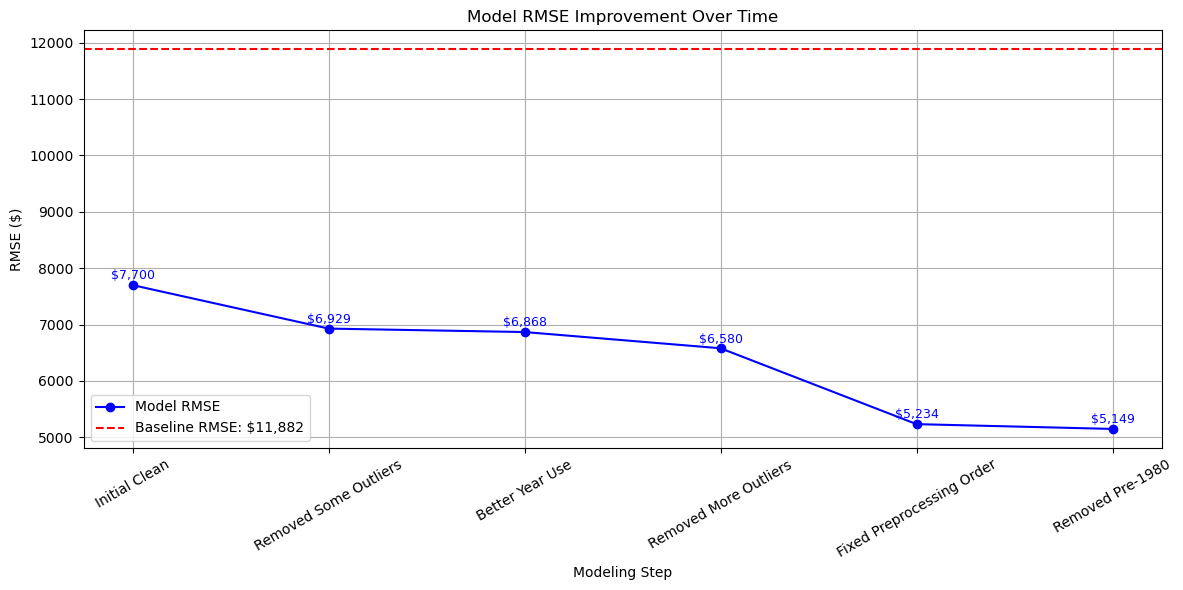

In [38]:


# Data
labels = [
    'Initial Clean',
    'Removed Some Priutliers',
    'Better Year Use',
    'Removed More Outliers',
    'Fixed Preprocessing Order',
    'Removed Pre-1980'
]
rmse_values = [7700, 6929.01, 6867.73, 6580.09, 5234.41, 5149.4]
baseline_rmse = 11882.19

# Plot
plt.figure(figsize=(12, 6))
plt.plot(labels, rmse_values, marker='o', linestyle='-', color='blue', label='Model RMSE')
plt.axhline(y=baseline_rmse, color='red', linestyle='--', label=f'Baseline RMSE: ${baseline_rmse:,.0f}')

# Add improvement annotations
for i, val in enumerate(rmse_values):
    plt.text(i, val + 100, f"${val:,.0f}", ha='center', fontsize=9, color='blue')

# Format
plt.title('Model RMSE Improvement Over Time')
plt.xlabel('Modeling Step')
plt.ylabel('RMSE ($)')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./images/model_rmse_improvement.png', dpi=300)  # You can change the filename and dpi as needed
plt.show()


**What this plot shows?**

This plot shows how each modeling decision helped reduce error while I was evaluating the model.  I went back several times to make changes to the model and dataset.  The changes in the data started at around **$7,700** and reached **$5,149** — about a 33% improvement

The model improvements in the graph show a clear visual contrast with the baseline RMSE of $11,882.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.


Here is a plot of the most important features to measuring the price of a used car in the data : 


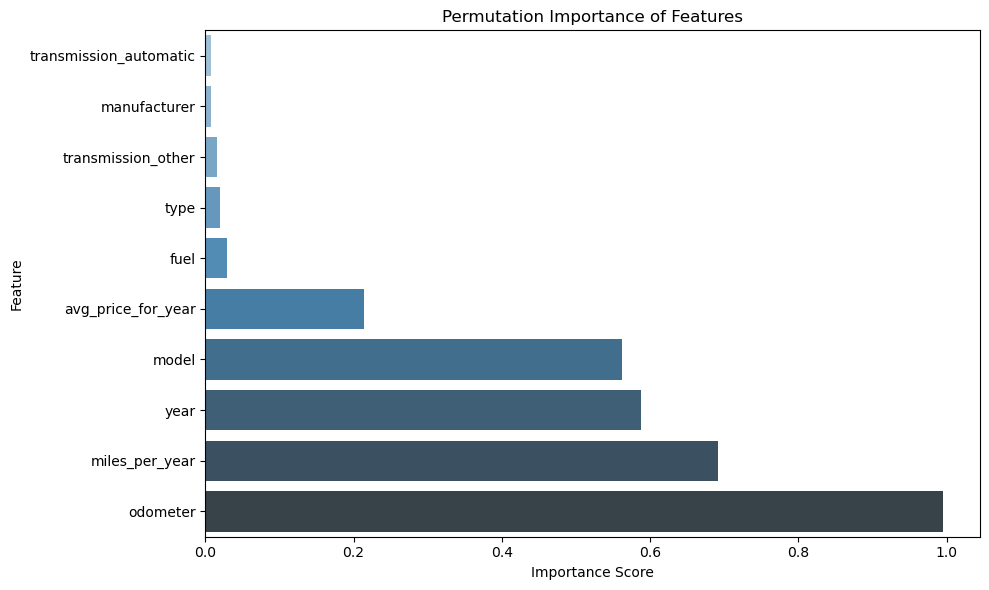

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
importance_values = {
    'odometer': 0.995245,
    'miles_per_year': 0.691095,
    'year': 0.587496,
    'model': 0.562656,
    'avg_price_for_year': 0.214018,
    'fuel': 0.028995,
    'type': 0.019809,
    'transmission_other': 0.015234,
    'manufacturer': 0.008033,
    'transmission_automatic': 0.007994
}

# Convert to DataFrame
importance_df = pd.DataFrame(list(importance_values.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues_d')
plt.title('Permutation Importance of Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('./images/permutation_importance_features.png', dpi=300)  # You can change the filename and dpi as needed
plt.show()

The odometer was the most important feature for the selling price.  The created feature miles_per_year was also very helpful for the model, followed by year, model and average_price_for_year.  

Having buyers and sales people paying close attention to the year and mileage can greatly help with finding prices that customers will find competitive.  

| Top Features That Drive Price| Value |
-------------------------------|-------|
| **Odometer** | Cars with higher mileage tend to sell for less |
| **Miles per Year** | Helps identify vehicles that are over- or under-used for their age |
| **Vehicle Year** | Newer vehicles generally command higher prices |
| **Model** | Some models retain value better than others |
| **Average Price for Year** | Reflects depreciation and market trends |


Used car dealers can apply these insights to:

- Price Smarter:
Use the model to help price trade-ins and new inventory based on mileage and age

- Improve pricing consistency across sales teams

- Stock Strategically:
Focus on vehicle years and models where the model performs best (2000–2022, mainstream brands)

- Avoid high-mileage or very old cars that are harder to price reliably

- Support Sales and Training:
Use insights to train new staff on what features most influence price

- Give customers data-backed explanations for trade-in valuations